In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [10]:
x_train = np.array([1.0, 2.0]) #features
y_train = np.array([300.0, 500.0]) #target values

In [11]:
def compute_cost(x,y,w,b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w*x[i] + b
        cost += (f_wb - y[i]) ** 2
    
    final_cost = (1/(2*m)) * cost

    return final_cost

<b> Above you can see a function to calculate the cost of error </b>

In [12]:
def compute_gradient(x, y, w, b):

    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        
        f_wb = w*x[i] + b

        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [13]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):


    J_history = []
    p_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = compute_gradient(x, y, w, b);

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i < 100000:
            J_history.append(compute_cost(x,y,w,b))
            p_history.append([w,b])
        
        if i% math.ceil(num_iters/10) == 0:
            print(f'Iteration {i:4}: Cost {J_history[-1]:0.2e}',
                  f'dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e} '
                  f'w: {w: 0.3e}, b: {b: 0.5e}')
    
    return w ,b, J_history, p_history

In [14]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 0.1

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations)

print(f'(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})')

Iteration    0: Cost 3.67e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w:  6.500e+01, b:  4.00000e+01
Iteration 1000: Cost 6.33e-06 dj_dw: -5.091e-04, dj_db:  8.238e-04 w:  2.000e+02, b:  1.00011e+02
Iteration 2000: Cost 2.77e-12 dj_dw: -3.366e-07, dj_db:  5.446e-07 w:  2.000e+02, b:  1.00000e+02
Iteration 3000: Cost 1.21e-18 dj_dw: -2.225e-10, dj_db:  3.600e-10 w:  2.000e+02, b:  1.00000e+02
Iteration 4000: Cost 5.49e-25 dj_dw: -1.705e-13, dj_db:  2.274e-13 w:  2.000e+02, b:  1.00000e+02
Iteration 5000: Cost 1.05e-25 dj_dw: -1.421e-13, dj_db:  5.684e-14 w:  2.000e+02, b:  1.00000e+02
Iteration 6000: Cost 1.05e-25 dj_dw: -1.421e-13, dj_db:  5.684e-14 w:  2.000e+02, b:  1.00000e+02
Iteration 7000: Cost 1.05e-25 dj_dw: -1.421e-13, dj_db:  5.684e-14 w:  2.000e+02, b:  1.00000e+02
Iteration 8000: Cost 1.05e-25 dj_dw: -1.421e-13, dj_db:  5.684e-14 w:  2.000e+02, b:  1.00000e+02
Iteration 9000: Cost 1.05e-25 dj_dw: -1.421e-13, dj_db:  5.684e-14 w:  2.000e+02, b:  1.00000e+02
(w,b) found by gradi

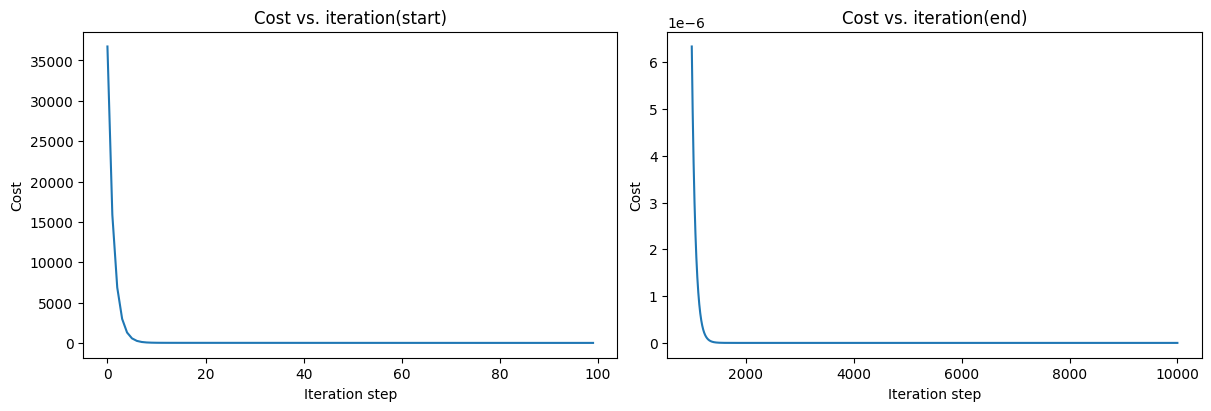

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)"); ax2.set_title("Cost vs. iteration(end)")
ax1.set_ylabel("Cost")         ;  ax2.set_ylabel("Cost")
ax1.set_xlabel("Iteration step")   ;  ax2.set_xlabel("Iteration step") 
plt.show()

<b> Above you can see plotting cost versus iteration </b>

In [16]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars
